In [1]:
path = 'datasets/bitly_usagov/example.txt'

In [2]:
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
import json

with open(path) as f:
    records = [json.loads(line) for line in f]

In [4]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [5]:
records[1]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Denver',
 'gr': 'UT',
 'g': 'mwszkS',
 'h': 'mwszkS',
 'l': 'bitly',
 'hh': 'j.mp',
 'r': 'http://www.AwareMap.com/',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php',
 't': 1331923249,
 'hc': 1308262393,
 'cy': 'Provo',
 'll': [40.218102, -111.613297]}

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [7]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [8]:
counts = get_counts(time_zones)
counts['America/New_York']

1251

In [9]:
len(time_zones)

3440

In [10]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [11]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [12]:
from collections import Counter

counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [13]:
import pandas as pd

frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [14]:
frame['tz'].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [15]:
tz_counts = frame['tz'].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [16]:
tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [17]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

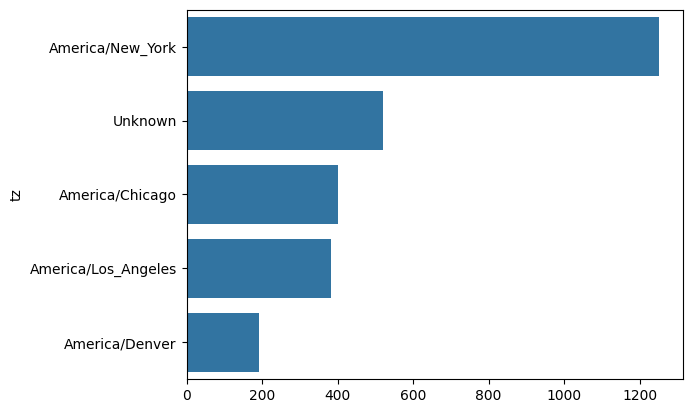

In [18]:
import seaborn as sns

subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [19]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [20]:
frame['a'][5]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [21]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [22]:
results = pd.Series([x.split()[0] for x in frame['a'].dropna()])
results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [23]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [26]:
import numpy as np

cframe = frame[frame['a'].notna()].copy()
cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe['os'].head()

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [30]:
by_tz_os = cframe.groupby(['tz', 'os'])

for (k1, k2), value in by_tz_os['t']:
    print((k1, k2))
    print(value.mean())

('', 'Not Windows')
1331924863.297959
('', 'Windows')
1331924876.0507247
('Africa/Cairo', 'Windows')
1331923896.0
('Africa/Casablanca', 'Windows')
1331926299.0
('Africa/Ceuta', 'Windows')
1331924695.5
('Africa/Johannesburg', 'Windows')
1331925332.0
('Africa/Lusaka', 'Windows')
1331924925.0
('America/Anchorage', 'Not Windows')
1331925117.75
('America/Anchorage', 'Windows')
1331923335.0
('America/Argentina/Buenos_Aires', 'Not Windows')
1331924105.0
('America/Argentina/Cordoba', 'Windows')
1331925543.0
('America/Argentina/Mendoza', 'Windows')
1331924531.0
('America/Bogota', 'Not Windows')
1331924648.0
('America/Bogota', 'Windows')
1331923603.5
('America/Caracas', 'Windows')
1331924514.0
('America/Chicago', 'Not Windows')
1331925052.278261
('America/Chicago', 'Windows')
1331925209.4736843
('America/Chihuahua', 'Not Windows')
1331926283.0
('America/Chihuahua', 'Windows')
1331924883.0
('America/Costa_Rica', 'Windows')
1331924669.0
('America/Denver', 'Not Windows')
1331925031.371212
('America

In [31]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [32]:
indexer = agg_counts.sum('columns').argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [33]:
count_subset = agg_counts.take(indexer.values[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [34]:
agg_counts.sum('columns').nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [35]:
count_subset = count_subset.stack()
count_subset.name = 'total'
count_subset = count_subset.reset_index()
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

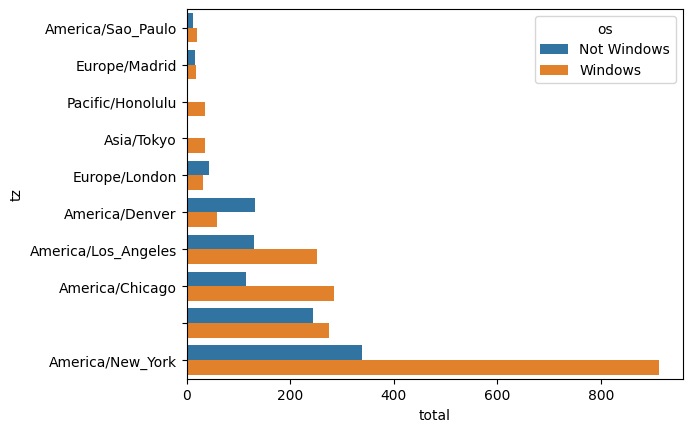

In [36]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [37]:
def norm_total(group):
    group['normed_total'] = group['total'] / group['total'].sum()
    return group

In [41]:
results = count_subset.groupby('tz').apply(norm_total, include_groups=False)
results.head()

os  total  normed_total
tz                                                  
                16  Not Windows  245.0      0.470250
                17      Windows  276.0      0.529750
America/Chicago 14  Not Windows  115.0      0.287500
                15      Windows  285.0      0.712500
America/Denver  10  Not Windows  132.0      0.691099

<Axes: xlabel='normed_total', ylabel='tz'>

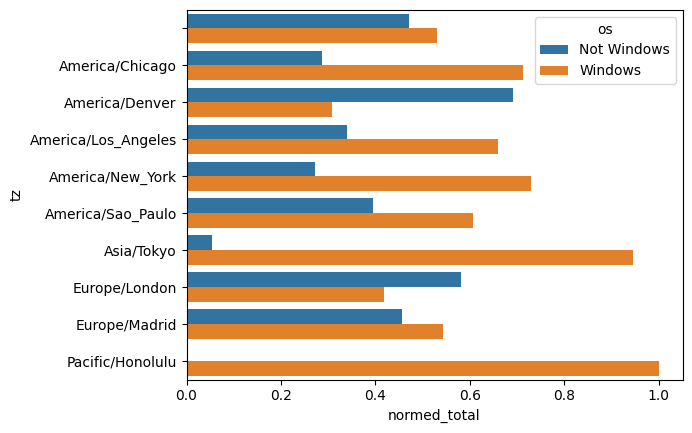

In [42]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [52]:
g = count_subset.groupby('tz')
results2 = count_subset['total'] / g['total'].transform('sum')
results2.head()

0    0.393939
1    0.606061
2    0.457143
3    0.542857
4    0.000000
Name: total, dtype: float64

<Axes: xlabel='normed_total', ylabel='tz'>

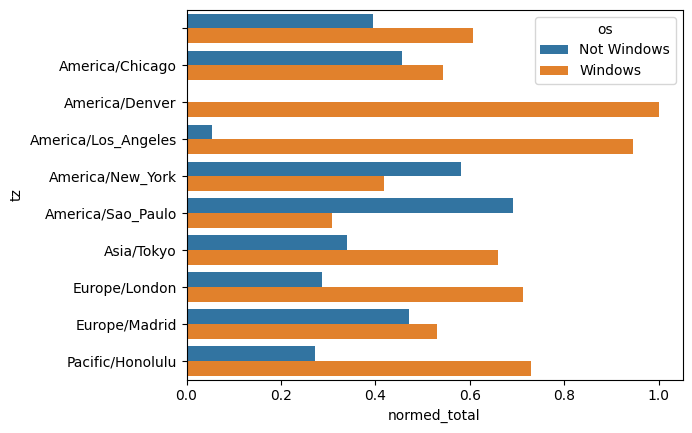

In [53]:
results['normed_total'] = results2.values
sns.barplot(x='normed_total', y='tz', hue='os', data=results)